<a href="https://colab.research.google.com/github/ExplorerGumel/Trailblazers-Qualification-Challenge/blob/main/Trailblazers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit,KFold
from sklearn.ensemble import AdaBoostRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import random
import os
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

seed_everything(42)


In [9]:
train=pd.read_csv("/content/Train.csv")
test=pd.read_csv("/content/Test.csv")
ss=pd.read_csv("/content/SampleSubmission.csv")
#variable_definition=pd.read_csv("/content/variable_descriptions.csv")

In [10]:
train.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [11]:
## Join train and test datasets inorder to perform preprocessing once at a time

Full_data = pd.concat([train,test],0)
print("Full_data shape : ",Full_data.shape)


## total_households and total individual has a very high values ranges than all others.To avoid skewness,let's scale them to range
# 1 to -1 and later on drop the unscaled ones
Full_data['Family'] = Full_data['total_individuals'] / Full_data['total_households']

mm = MinMaxScaler()

Full_data['scaled_total_households'] = mm.fit_transform(Full_data['total_households'].values.reshape(-1,1))
Full_data  = Full_data.drop('total_households', axis=1)
Full_data['scaled_total_individuals'] = mm.fit_transform(Full_data['total_individuals'].values.reshape(-1,1))
Full_data  = Full_data.drop('total_individuals', axis=1)
Full_data.head()

Full_data shape :  (3835, 63)


<ipython-input-11-bea2d6241aa7>:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  Full_data = pd.concat([train,test],0)


,ward,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,...,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL,Family,scaled_total_households,scaled_total_individuals
0,41601001: Ward 1,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,...,0.012928,0.0,0.0,ZA4161001,-29.682270,24.734743,0.292039,3.516501,0.042169,0.060514
1,41601002: Ward 2,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,...,0.004131,0.0,0.0,ZA4161002,-29.119311,24.757737,3.207775,3.877587,0.043745,0.069786
2,41601003: Ward 3,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,...,0.040881,0.0,0.0,ZA4161003,-29.142276,25.094093,0.000000,3.025929,0.060543,0.075672
3,41601004: Ward 4,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,...,0.005011,0.0,0.0,ZA4161004,-29.372052,24.942867,2.038778,3.294194,0.043841,0.058831
4,41601005: Ward 5,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,...,0.017629,0.0,0.0,ZA4161005,-29.409381,25.290165,0.000000,3.846971,0.043582,0.068931


In [12]:
## Feature extraction

#Based on the features given, we extract worst cases(Those with no access to water,no landline,lived in caravan/tent, e.t.c)
#while best case otherwise

Full_data['Worst_case'] = Full_data['pw_06']+Full_data['lln_01']+Full_data['dw_10']+Full_data['psa_01']+Full_data['car_01']+Full_data['stv_00']
Full_data['Best_case'] = Full_data['pw_00']+Full_data['lln_00']+Full_data['dw_00']+Full_data['psa_00']+Full_data['car_00']+Full_data['stv_01']

Full_data.head()

,ward,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,...,pw_08,ADM4_PCODE,lat,lon,NL,Family,scaled_total_households,scaled_total_individuals,Worst_case,Best_case
0,41601001: Ward 1,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,...,0.0,ZA4161001,-29.682270,24.734743,0.292039,3.516501,0.042169,0.060514,2.513173,3.045809
1,41601002: Ward 2,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,...,0.0,ZA4161002,-29.119311,24.757737,3.207775,3.877587,0.043745,0.069786,2.447272,2.404363
2,41601003: Ward 3,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,...,0.0,ZA4161003,-29.142276,25.094093,0.000000,3.025929,0.060543,0.075672,2.511429,2.526830
3,41601004: Ward 4,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,...,0.0,ZA4161004,-29.372052,24.942867,2.038778,3.294194,0.043841,0.058831,2.529029,2.687843
4,41601005: Ward 5,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,...,0.0,ZA4161005,-29.409381,25.290165,0.000000,3.846971,0.043582,0.068931,2.343123,3.110453


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


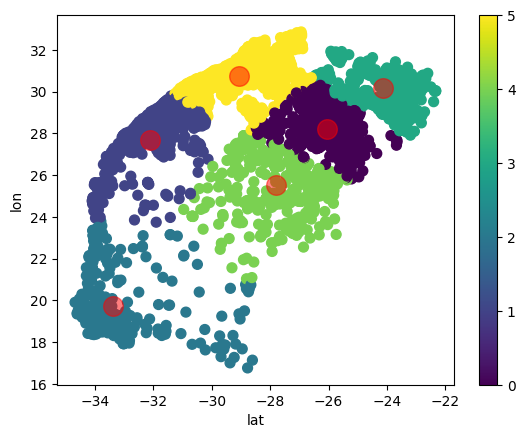

In [13]:
# Let use kmeans to cluster based on the lattitude and longitude 

kmeans = KMeans(n_clusters =6, init ='k-means++')
kmeans.fit(Full_data[['lat','lon']])
Full_data['cluster_label'] = kmeans.fit_predict(Full_data[['lat','lon']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.labels_
Full_data.plot.scatter(x = 'lat', y = 'lon', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=200, alpha=0.5)

In [14]:
columns=Full_data.drop(["ward","target","ADM4_PCODE"],1).columns
columns

<ipython-input-14-025043dfdd0a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  columns=Full_data.drop(["ward","target","ADM4_PCODE"],1).columns


Index(['dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07',
       'dw_08', 'dw_09', 'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00',
       'psa_01', 'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00',
       'car_01', 'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03',
       'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10',
       'lan_11', 'lan_12', 'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02',
       'pg_03', 'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04',
       'pw_05', 'pw_06', 'pw_07', 'pw_08', 'lat', 'lon', 'NL', 'Family',
       'scaled_total_households', 'scaled_total_individuals', 'Worst_case',
       'Best_case', 'cluster_label'],
      dtype='object')

In [15]:
columns=Full_data.drop(["ward","target","ADM4_PCODE"],1).columns
data_km=Full_data[columns].copy()
km=KMeans(10,random_state=2019)
Full_data["cluster"]=km.fit_predict(data_km[columns])
Full_data["cluster"].value_counts()

<ipython-input-15-32228e570018>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  columns=Full_data.drop(["ward","target","ADM4_PCODE"],1).columns
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2    1017
4     603
7     481
9     408
3     366
8     295
6     280
5     268
0     116
1       1
Name: cluster, dtype: int64

In [16]:

Full_data['W'] = LabelEncoder().fit_transform(Full_data['ward'])
Full_data['car_01_bin'] = Full_data['car_01'].apply(lambda x : np.round(x * 100) ) 
Full_data['psa_01_bin'] = Full_data['psa_01'].apply(lambda x : np.round(x * 100) ) 
Full_data['stv_01_bin'] = Full_data['stv_01'].apply(lambda x : np.round(x * 100) ) 
Full_data['W_encoded1'] = Full_data.groupby('W')['psa_01_bin'].transform('mean')
Full_data['W_encoded2'] = Full_data.groupby('W')['car_01_bin'].transform('mean')
Full_data['W_encoded3'] = Full_data.groupby('W')['stv_01_bin'].transform('mean')
Full_data = Full_data.drop(['W','car_01_bin','psa_01_bin','stv_01_bin'],1)

<ipython-input-16-a1e09c64a858>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Full_data = Full_data.drop(['W','car_01_bin','psa_01_bin','stv_01_bin'],1)


In [17]:

Full_data['Cluster_label_encoded'] = Full_data.groupby('cluster_label')['target'].transform('mean')

train_set = Full_data[Full_data.target.notnull()]
test_set = Full_data[Full_data.target.isnull()]


In [18]:
test_set=test_set.drop('target',axis=1)
test_set=test_set.drop(['ward','ADM4_PCODE' ],axis=1)
train_set=train_set.drop(['ward','ADM4_PCODE' ],axis=1)

In [19]:
train_set

,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,...,scaled_total_households,scaled_total_individuals,Worst_case,Best_case,cluster_label,cluster,W_encoded1,W_encoded2,W_encoded3,Cluster_label_encoded
0,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,...,0.042169,0.060514,2.513173,3.045809,4,7,61.0,73.0,72.0,22.187327
1,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,...,0.043745,0.069786,2.447272,2.404363,4,2,55.0,86.0,90.0,22.187327
2,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,...,0.060543,0.075672,2.511429,2.526830,4,2,68.0,73.0,83.0,22.187327
3,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,...,0.043841,0.058831,2.529029,2.687843,4,2,59.0,87.0,91.0,22.187327
4,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,...,0.043582,0.068931,2.343123,3.110453,4,2,52.0,60.0,65.0,22.187327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,6.393480,0.874972,0.003146,0.017230,0.004735,0.048888,0.000654,0.017798,0.005539,0.010383,...,0.082166,0.122505,2.311651,3.289393,4,4,55.0,20.0,25.0,22.187327
2818,15.668000,0.636235,0.002262,0.010433,0.000000,0.003030,0.000000,0.008028,0.095099,0.210044,...,0.036843,0.082632,2.427999,2.487853,4,2,60.0,71.0,82.0,22.187327
2819,13.238795,0.855975,0.006601,0.061118,0.000812,0.003912,0.000812,0.017205,0.036566,0.008099,...,0.035132,0.064390,2.434193,2.865849,4,8,57.0,60.0,65.0,22.187327
2820,17.639523,0.792552,0.004423,0.016099,0.000000,0.000674,0.000000,0.006907,0.038522,0.116643,...,0.042301,0.083791,2.502904,2.701088,4,8,55.0,72.0,68.0,22.187327


In [20]:

feature_cols = [x for x in train_set.columns if x != 'target']

strat_shuff_split = KFold(n_splits=5)

train_idx,test_idx = next(strat_shuff_split.split(train_set[feature_cols],train_set['target']))

X_train = train_set.loc[train_idx,feature_cols]
y_train = train_set.loc[train_idx,'target']
X_test = train_set.loc[test_idx,feature_cols]
y_test = train_set.loc[test_idx,'target']

ada=AdaBoostRegressor(learning_rate=0.6282347769006077,n_estimators=263,random_state=42,estimator=LinearRegression())
ada.fit(X_train,y_train)
prediction=ada.predict(X_test)

print(mean_squared_error(y_test,prediction))

17.29813077625165


# MULTI-LAYER PERCEPTRONS IMPLEMENTATION

In [21]:
import matplotlib.pyplot as plt
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mae']), 
           label='Train')
  plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val')
  plt.legend()
#  plt.ylim([0,max(history.history['val_mae'])])

def plot_prediction(test_labels, test_predictions):
  plt.figure()
  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values [1000$]')
  plt.ylabel('Predictions [1000$]')
  plt.axis('equal')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  _ = plt.plot([-100, 100],[-100,100])

  plt.figure()
  error = test_predictions - test_labels
  plt.hist(error, bins = 50)
  plt.xlabel("Prediction Error [1000$]")
  _ = plt.ylabel("Count")

In [34]:
train_set.shape,X_train.shape,X_test.shape

((2822, 70), (2257, 69), (565, 69))

((2822, 70), (2257, 69), (565, 69))

In [44]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.05)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

early_Stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=10,)

#class myCallback(tf.keras.callbacks.Callback):
#  def on_epoch_end(self, epoch, logs={}):
#    if logs.get('loss') <= 0.6 and logs.get('loss') >= 0.2: # Experiment with changing this value
#      print("\nReached 60% accuracy so cancelling training!")
#      self.model.stop_training = True

#callbacks = myCallback()

In [45]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras import Sequential

def build_model():
  model = Sequential()
  model.add(Input(shape=(X_train.shape[1],)))                  
  model.add(Dense(64, activation=tf.nn.relu))
  model.add(Dense(64, activation=tf.nn.relu))
  model.add(Dense(1))
  
  optimizer = tf.keras.optimizers.RMSprop()

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                4480      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,705
Trainable params: 8,705
Non-trainable params: 0
_________________________________________________________________


In [46]:
EPOCHS = 1000
# Store training stats
history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=(X_test,y_test),callbacks=[callback,early_Stopping])

Epoch 1/1000
71/71 [==============================] - 1s 5ms/step - loss: 176.7754 - mae: 7.1443 - val_loss: 21.1027 - val_mae: 3.4012 - lr: 0.0010
Epoch 2/1000
71/71 [==============================] - 0s 3ms/step - loss: 26.4294 - mae: 4.0348 - val_loss: 20.3719 - val_mae: 3.4180 - lr: 0.0010
Epoch 3/1000
71/71 [==============================] - 0s 3ms/step - loss: 49.8722 - mae: 3.8695 - val_loss: 17.7674 - val_mae: 3.1716 - lr: 0.0010
Epoch 4/1000
71/71 [==============================] - 0s 3ms/step - loss: 27.2353 - mae: 3.7900 - val_loss: 17.1780 - val_mae: 3.0737 - lr: 0.0010
Epoch 5/1000
71/71 [==============================] - 0s 3ms/step - loss: 48.3749 - mae: 3.8267 - val_loss: 17.5403 - val_mae: 3.1324 - lr: 0.0010
Epoch 6/1000
71/71 [==============================] - 0s 3ms/step - loss: 26.4415 - mae: 3.6036 - val_loss: 24.0514 - val_mae: 3.7990 - lr: 0.0010
Epoch 7/1000
71/71 [==============================] - 0s 3ms/step - loss: 41.4295 - mae: 3.6048 - val_loss: 27.7035 -

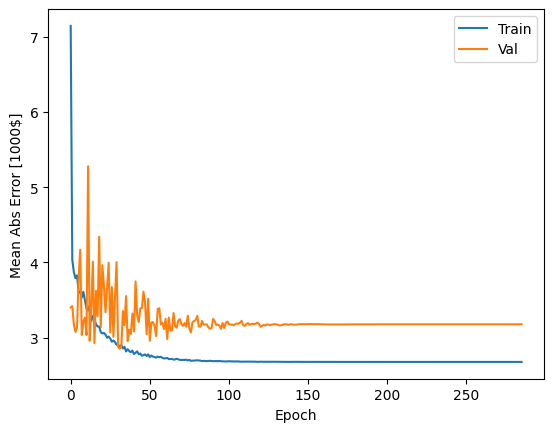

In [47]:
plot_history(history)

In [51]:
y_test.shape, test_predictions.shape

((565,), (565,))

18/18 [==============================] - 0s 1ms/step


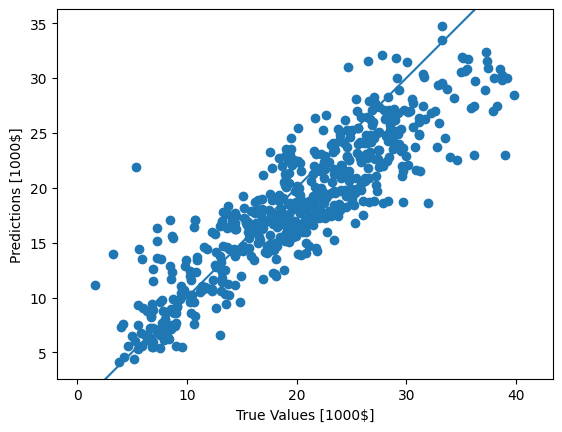

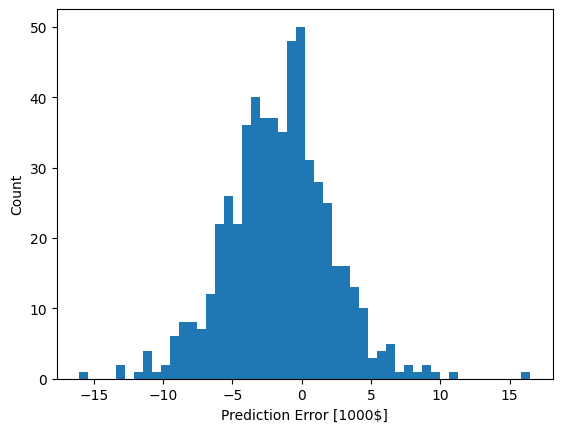

In [50]:
test_predictions = model.predict(X_test).flatten()
plot_prediction(y_test, test_predictions)

# CONV1D LAYER IMPLEMENTATION

In [52]:
sample_size = X_train.shape[0] # number of samples in train set
time_steps  = X_train.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

X_train_reshaped = X_train.values.reshape(sample_size,time_steps,input_dimension)
X_test_reshaped = X_test.values.reshape(X_test.shape[0],X_test.shape[1],1)

print("After reshape train data set shape:\n", X_train_reshaped.shape)
print("1 Sample shape:\n",X_train_reshaped[0].shape)
print("An example sample:\n", X_train_reshaped[0])

After reshape train data set shape:
 (2257, 69, 1)
1 Sample shape:
 (69, 1)
An example sample:
 [[ 3.09808375e-01]
 [ 1.73172870e-03]
 [ 3.09826511e-02]
 [ 1.70536780e-03]
 [ 7.56424700e-04]
 [ 2.24802490e-03]
 [ 3.79071566e-02]
 [ 3.31469829e-01]
 [ 2.70344863e-01]
 [ 3.32356060e-03]
 [ 3.54387100e-04]
 [ 9.36763170e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 2.27779237e-01]
 [ 6.18353243e-01]
 [ 7.88913900e-04]
 [ 3.95342537e-02]
 [ 1.13544353e-01]
 [ 7.42063475e-02]
 [ 9.25793653e-01]
 [ 1.28773808e-01]
 [ 8.71226192e-01]
 [ 1.50382665e-02]
 [ 9.84961734e-01]
 [ 1.00740011e-02]
 [ 4.53217482e-02]
 [ 1.59924994e-02]
 [ 2.18902063e-01]
 [ 2.52013611e-01]
 [ 5.50368110e-02]
 [ 1.19175698e-01]
 [ 2.84088110e-02]
 [ 4.80914080e-03]
 [ 1.10596230e-02]
 [ 4.36480410e-02]
 [ 1.75074845e-01]
 [ 2.04831077e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 9.87908059e-01]
 [ 4.18764380e-03]
 [ 6.79375800e-04]
 [ 1.63545950e-03]
 [ 5.58946200e-03]
 [ 6.76550630e-01]
 [ 3.43917179e-01]
 [ 3.886850

In [67]:
from tensorflow.keras.layers import Dropout, Conv1D, MaxPooling1D

def build_conv1D_model():

  model = Sequential(name="model_conv1D")
  model.add(Input(shape=(time_steps,input_dimension)))
  model.add(Conv1D(filters=64, kernel_size=5, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01), name="Conv1D_1"))
  model.add(Dropout(0.5))
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01), name="Conv1D_2"))
  
  model.add(Conv1D(filters=64, kernel_size=2, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01), name="Conv1D_3"))
  
  model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Flatten())
  model.add(Dense(16, activation='relu', name="Dense_1"))
  model.add(Dense(input_dimension, name="Dense_2"))


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
  return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()

Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 65, 64)            384       
                                                                 
 dropout_5 (Dropout)         (None, 65, 64)            0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 63, 64)            12352     
                                                                 
 Conv1D_3 (Conv1D)           (None, 62, 64)            8256      
                                                                 
 MaxPooling1D (MaxPooling1D)  (None, 31, 64)           0         
                                                                 
 batch_normalization (BatchN  (None, 31, 64)           256       
 ormalization)                                                   
                                                      

In [68]:
# Store training stats
history = model_conv1D.fit(X_train_reshaped, y_train, epochs=EPOCHS,
                    validation_data=(X_test_reshaped,y_test), verbose=1)

Epoch 1/1000
71/71 [==============================] - 7s 60ms/step - loss: 108.3480 - mae: 8.0149 - val_loss: 66.2048 - val_mae: 6.8859
Epoch 2/1000
71/71 [==============================] - 3s 48ms/step - loss: 47.9968 - mae: 5.3047 - val_loss: 75.8992 - val_mae: 7.5615
Epoch 3/1000
71/71 [==============================] - 3s 39ms/step - loss: 40.7690 - mae: 4.8022 - val_loss: 54.7870 - val_mae: 6.1158
Epoch 4/1000
71/71 [==============================] - 3s 44ms/step - loss: 37.8237 - mae: 4.6136 - val_loss: 61.1987 - val_mae: 6.4088
Epoch 5/1000
71/71 [==============================] - 3s 41ms/step - loss: 33.4911 - mae: 4.3453 - val_loss: 76.3298 - val_mae: 7.2789
Epoch 6/1000
71/71 [==============================] - 3s 47ms/step - loss: 31.2592 - mae: 4.1502 - val_loss: 79.8851 - val_mae: 7.3797
Epoch 7/1000
71/71 [==============================] - 3s 38ms/step - loss: 29.2011 - mae: 4.0046 - val_loss: 65.3838 - val_mae: 6.5636
Epoch 8/1000
71/71 [==============================] - 

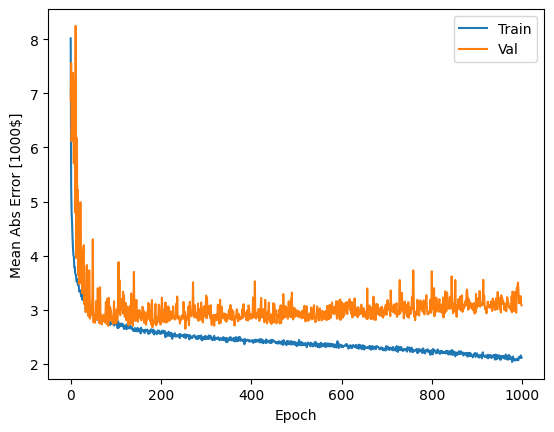

In [69]:
plot_history(history)

18/18 [==============================] - 0s 5ms/step


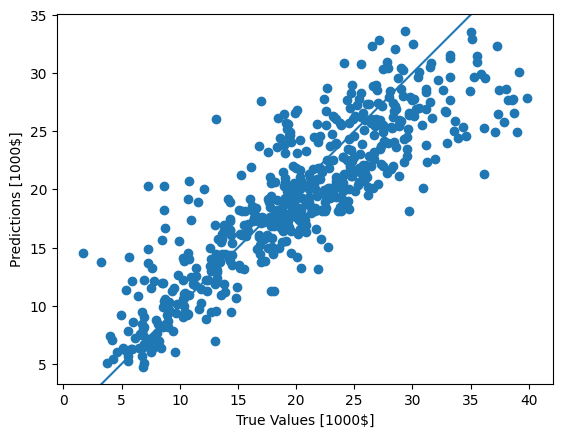

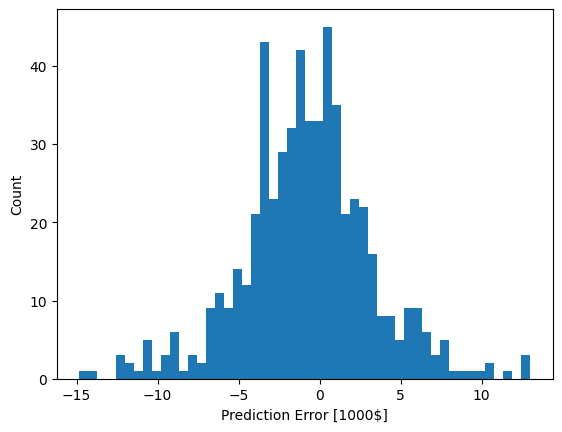

In [70]:
test_predictions = model_conv1D.predict(X_test_reshaped).flatten()
plot_prediction(y_test, test_predictions)